In [1]:
import sys
import stmpy
import numpy as np
import cancelv3 as cancel
from decimal import *
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pandas as pd
import scipy.fftpack as fftp
import os
from scipy import signal
import scipy
import matplotlib.pyplot as plt
import time
%pylab inline

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
folder_loc = 'Chirp Data/JG_DL_R2/'
file_loc = '20-02-19-17-38_JG_DL_R2_001.dat'
dat = np.loadtxt(folder_loc+file_loc,skiprows=94)

for filename in os.listdir(folder_loc):
    if filename == file_loc:
        pass
    try:
        tempdata = np.loadtxt(folder_loc+filename, skiprows=94)
        dat = np.concatenate((dat,tempdata))
        print(filename,end='\r')
    except:
        print('ERROR: ',filename)

In [3]:
current = dat[:,0]
chirp = dat[:,1]
geo = dat[:,2]
tip = dat[:,3]
# plot(normalize2(chirp))
# plot(normalize2(geo))
# plot(normalize2(current))
# plot(normalize2(tip))
# xlim(0,200000)

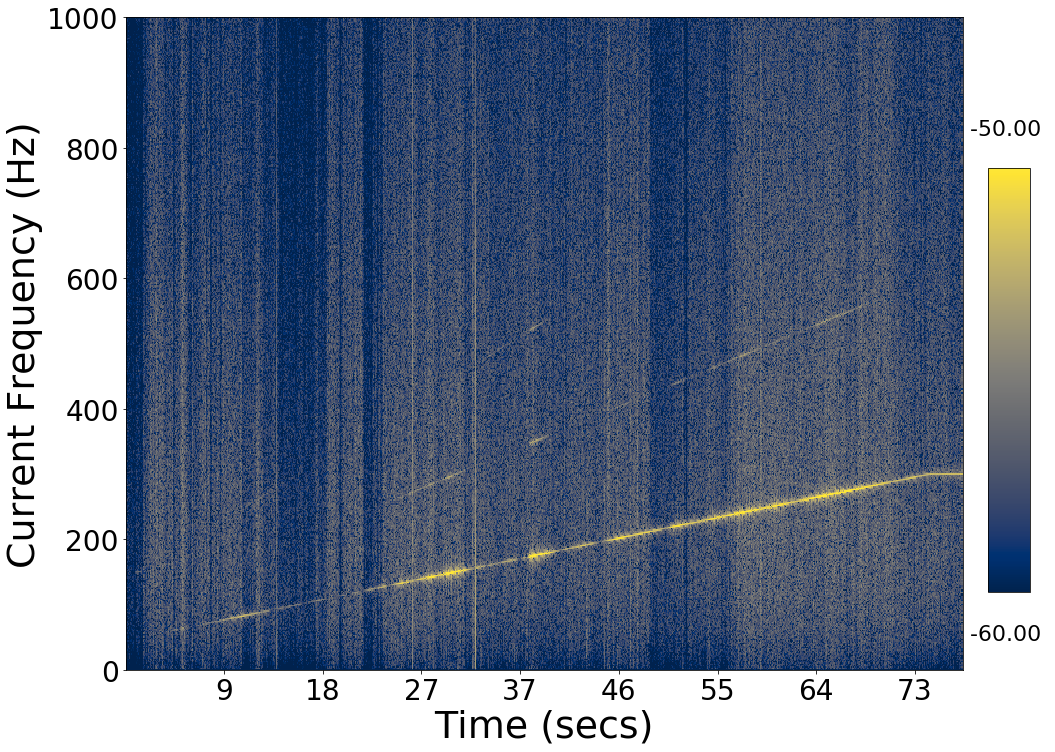

In [13]:
fig,ax = subplots(figsize=[15,12])

# ax = subplot(111)
# im = imshow(transf_2d_show, cmap=stmpy.cm.cividis, aspect=1, clim=(0,0.1),rasterized=True)
fs = 20000
f, t_spt, Sxx = signal.spectrogram(current, fs,nperseg=10000)

im1 = ax.pcolormesh(t_spt,f,log(Sxx),cmap=stmpy.cm.cividis,vmin=-60,vmax=-50)
cb = stmpy.image.add_cbar(thickness='5%',length='65%',hPos=0.91,fs=22)
# cb.set_label('colorbar label', color='w')
# plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='r')
ax.axes.set_xticklabels((t_spt[::21]).astype('int'),color='k')
ax.axes.set_yticklabels(['0','200','400','600','800','1000'],color='k')
ax.axes.tick_params(labelsize=28,color='k')
ax.set_xlabel('Time (secs)',size=38,color='k')
ax.set_ylabel('Current Frequency (Hz)',size=38,color='k')
ax.set_ylim(0,1000)
savefig('2020-02-19 Current Chirp Spectrogram',transparent= True)

In [33]:
print(Sxx[1,1])
# print((t_spt))

1.2079286296787915e-28


8493800 8493800
Logistic curve fit: 0.7424468994140625
polynomial curve fit: 0.5123255252838135


Text(0, 0.5, 'Amplitude')

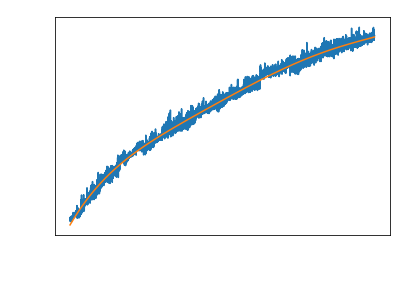

In [6]:
def logistic(x, L, k, x0, c):
    return L / (1 + np.exp(-k*(x-x0))) + c
fs =20e3
t = linspace(0,len(dat[:,0])/fs,len(dat[:,0]))
y = (tip-mean(tip))*1e12
print(len(t),len(y))
p0 = array([1000, 0.01, 0, -800])
t1 = time.time() 
pf = stmpy.tools.curve_fit(logistic, t[::600], y[::600], p0=p0)
t2 = time.time()
polyfitted = poly1d(polyfit(t[::600],tip[::600]-mean(tip[::600]),5))
t3 = time.time()
print('Logistic curve fit:',t2-t1)
print('polynomial curve fit:',t3-t2)

plot(t[::600], tip[::600]-mean(tip[::600]))
# plot(t[::600], logistic(t[::600], *pf))
plot(t,polyfitted(t))
tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


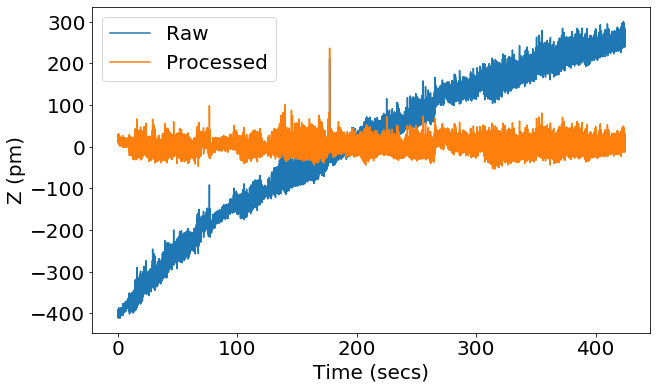

In [7]:
figsize(10,6)
new_data = y - logistic(t, *pf)
poly_z = tip-mean(tip)-polyfitted(t)
# plot(t, new_data)
plot(t,(tip-mean(tip))*1e12,label='Raw')
plot(t,poly_z*1e12,label='Processed')

# plot(t[::600], logistic(t[::600], *pf))
# xlim(0,6)
tick_params(labelsize=20,colors='black')
xlabel('Time (secs)',size=20,color='black')
ylabel('Z (pm)',size=20,color='black')
legend(fontsize=20)
# savefig('Stop piezo drift.png')

No handles with labels found to put in legend.


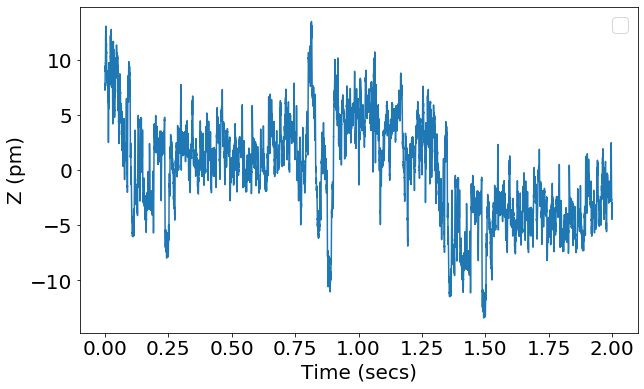

In [214]:
plot(t[0:40000],poly_z[0:40000]*1e12-mean(poly_z[0:40000]*1e12))
tick_params(labelsize=20,colors='black')
xlabel('Time (secs)',size=20,color='black')
ylabel('Z (pm)',size=20,color='black')
# ylim(-50,50)
legend(fontsize=20)
savefig('Raw tip data.png')

(0, 10)

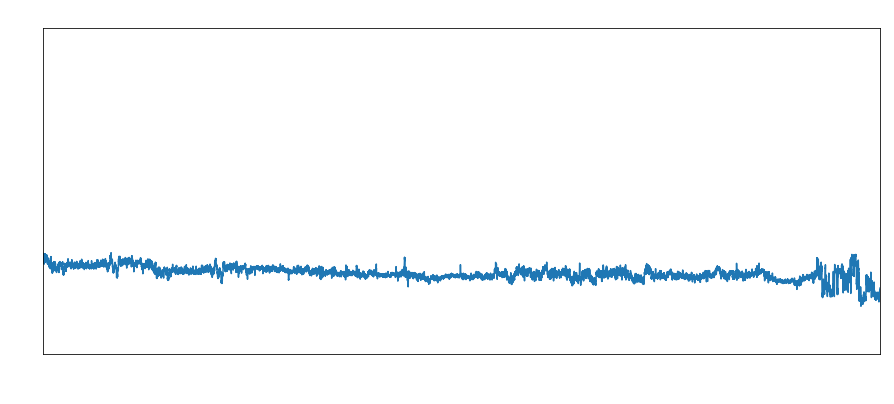

In [215]:
from scipy.optimize import curve_fit
figsize(15,6)
def normalize2(array):
    return (array-mean(array))/(max(array) - min(array))
def remove_piezo_drift(data, p0=None):

#     Removes vertical axis piezo drift for 2D image files (.sxm) by fitting
#     average y values to a logistic function (fundamental model for piezo
#     drift).
#     Inputs:
#         data    - Required : Numpy array containing image data (must be 2D).
#     Returns:
#         out     - Numpy 2D array with drift removed. The mean is set to zero,
#                   but the units are retained.
#     History:
#         2019-10-02  - HP : Initial commit.
#     ‘’'
    datan = (data-np.min(data)) / np.max(data-np.min(data))
    print(shape(datan))
    y = np.mean(datan, axis=0)
    x = np.linspace(0,1,data.shape[0])
    def logistic(x, L, k, x0, c):
        return L / (1 + np.exp(-k*(x-x0))) + c
    p0 = curve_fit(logistic, x, y)
    ls = logistic(x, *p0)
    out = np.zeros_like(data)
    for ix, line in enumerate(datan):
        print(ix,end='\r')
        out[ix] = line - ls[ix]
    outn = out * np.max(data-np.min(data)) + np.min(data)
    return outn - np.mean(outn)

fs = 20e3 #oversampling was 1
t = linspace(0,len(dat[:,0])/fs,len(dat[:,0]))
# data_no_drift = remove_piezo_drift(tip*1e9)
plot(t,poly_z)
# plot(t,normalize2(geo))
# plot(t,normalize2(tip))

tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
title('Chirp waveform',size=20,color='white')

xlim(0,10)

In [216]:

start = int(5*fs)
end = int(403.75*fs)
print(end)
current_clip = current[start:end+start+1]
chirp_clip = chirp[start:end+start+1]
geo_clip = geo[start:end+start+1]
tip_clip = poly_z[start:end+start+1]
print(len(current_clip),len(chirp_clip),len(geo_clip),len(tip_clip))

8075000
8075001 8075001 8075001 8075001


0.7763975155279468 hz resolution
8075001


(1.2, 1.3)

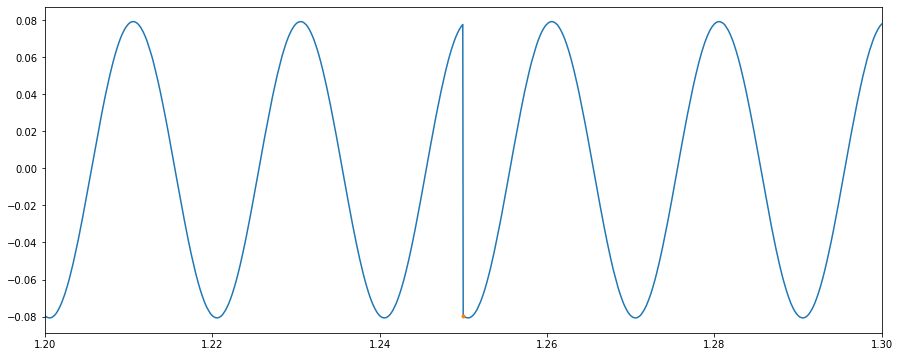

In [217]:
figsize(15,6)
t = linspace(0,len(current_clip)/fs,len(current_clip))
seperation = 1.25
change_loc = linspace(1.25,403.75,323)
loc = (change_loc*fs).astype('int')
freq_map = linspace(50,300,len(loc))
print(freq_map[1]-50,'hz resolution')
# print((300-50)/326)
# frequency_change = (arange((len(current_clip)/fs)*seperation)*fs).astype('int')
# print(arange((len(current_clip)/fs))*seperation)
# print(loc)
# print(freq_map)
# print(frequency_change)
# print(t[-1])
print(len(t))
plot(t,chirp_clip)
plot(t[loc[0]],chirp_clip[loc[0]],'.')
xlim(1.2,1.3)
# plot()

0.7763975155279468


(400, 404)

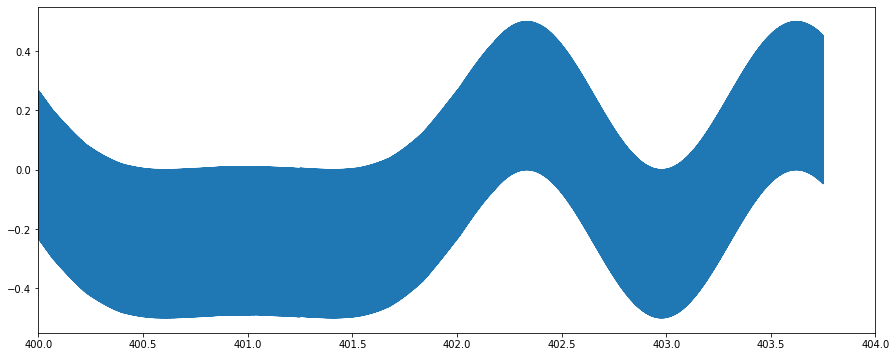

In [218]:
x = t
dx = x[1]-x[0]
y = chirp_clip
dydx = numpy.gradient(y, dx)
print(freq_map[1]-50)
plot(t,normalize2(chirp_clip)*sin((300-0.776397)*2*pi*t))
# plot(t,normalize2(dydx)*5)
short = 398
xlim(400,404)
# ylim(-0.5,0.5)


In [219]:
def coef(w,geo,tip,t_array,harmonic,fs=1000):
    
    if w*harmonic >= fs/2:
        return 0 + 0*1j
    
    ref_tip = tip*(np.cos(w*harmonic*2*pi*t_array)-1j*sin(w*harmonic*2*pi*t_array)) 
    ref_geo = geo*(np.cos(w*2*pi*t_array)-1j*sin(w*2*pi*t_array))
    
    sos = signal.butter(10, w/5, 'lowpass', fs=fs, output='sos')
    
    filt_tip = signal.sosfilt(sos,ref_tip)
    filt_geo = signal.sosfilt(sos,ref_geo)
    
    
    lock_tip = average(filt_tip)
    lock_geo = average(filt_geo)
    Z = lock_tip/lock_geo
    
    return Z

prev = 0
harmonics = 20

fftfreq = fft.fftfreq(int(20000/(freq_map[1]-50)),1/20000)
# print(fftfreq[387])
# print(fftfreq[64])
# print(len(fftfreq))
C = np.zeros((len(fftfreq),harmonics),dtype='complex128')


for w,point,i in zip(freq_map,loc,arange(len(freq_map))):
    i = i+64
    print(w,end='\r')
    input_wave = geo_clip[prev:point]
    output_wave = tip_clip[prev:point]
    t_split = t[prev:point]
    for j in arange(harmonics):
        C[i,j] = coef(w,input_wave,output_wave,t_split,(j+1),fs = 20000)

    prev = point
C[int(len(C[:,0])/2):,:] = flip(conj(C[1:int(len(C[:,0])/2)+1]),axis=0)

(50, 300)

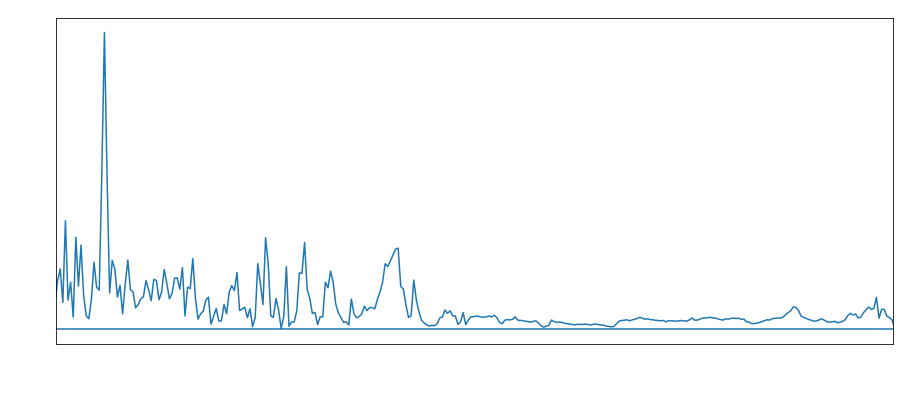

In [220]:
plot(fftfreq,absolute(C[:,0]))
# semilogy(fftfreq,absolute(C[:,1]))
# semilogy(fftfreq,absolute(C[:,2]))
# semilogy(fftfreq,absolute(C[:,3]))
tick_params(labelsize=12,colors='white')
xlabel('Frequency (Hz)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
xlim(50,300)

In [221]:
C1 = scipy.interpolate.interp1d(fftfreq,C[:,0], kind='linear',fill_value='extrapolate')
C2 = scipy.interpolate.interp1d(fftfreq,C[:,1], kind='linear',fill_value='extrapolate')
C3 = scipy.interpolate.interp1d(fftfreq,C[:,2], kind='linear',fill_value='extrapolate')
C4 = scipy.interpolate.interp1d(fftfreq,C[:,3], kind='linear',fill_value='extrapolate')
C5 = scipy.interpolate.interp1d(fftfreq,C[:,4], kind='linear',fill_value='extrapolate')
C6 = scipy.interpolate.interp1d(fftfreq,C[:,5], kind='linear',fill_value='extrapolate')
C7 = scipy.interpolate.interp1d(fftfreq,C[:,6], kind='linear',fill_value='extrapolate')
C8 = scipy.interpolate.interp1d(fftfreq,C[:,7], kind='linear',fill_value='extrapolate')
C9 = scipy.interpolate.interp1d(fftfreq,C[:,8], kind='linear',fill_value='extrapolate')
C10 = scipy.interpolate.interp1d(fftfreq,C[:,9], kind='linear',fill_value='extrapolate')
C11 = scipy.interpolate.interp1d(fftfreq,C[:,10], kind='linear',fill_value='extrapolate')
C12 = scipy.interpolate.interp1d(fftfreq,C[:,11], kind='linear',fill_value='extrapolate')
C13 = scipy.interpolate.interp1d(fftfreq,C[:,12], kind='linear',fill_value='extrapolate')
C14 = scipy.interpolate.interp1d(fftfreq,C[:,13], kind='linear',fill_value='extrapolate')
C15 = scipy.interpolate.interp1d(fftfreq,C[:,14], kind='linear',fill_value='extrapolate')
C16 = scipy.interpolate.interp1d(fftfreq,C[:,15], kind='linear',fill_value='extrapolate')
C17 = scipy.interpolate.interp1d(fftfreq,C[:,16], kind='linear',fill_value='extrapolate')
C18 = scipy.interpolate.interp1d(fftfreq,C[:,17], kind='linear',fill_value='extrapolate')
C19 = scipy.interpolate.interp1d(fftfreq,C[:,18], kind='linear',fill_value='extrapolate')
C20 = scipy.interpolate.interp1d(fftfreq,C[:,19], kind='linear',fill_value='extrapolate')

In [222]:
G = fft.fft(geo[:int(5*fs)])
omega = fft.fftfreq(len(geo[:int(5*fs)]),1/20000)
G = scipy.interpolate.interp1d(omega,G,kind='linear',fill_value='extrapolate')


In [223]:
z_omega = (C1(omega)*G(omega))# + C2(omega/2)*G(omega/2) + C3(omega/3)*G(omega/3) +
#            C4(omega/4)*G(omega/4))
z_vib = fft.ifft(z_omega)

Text(0, 0.5, 'Amplitude')

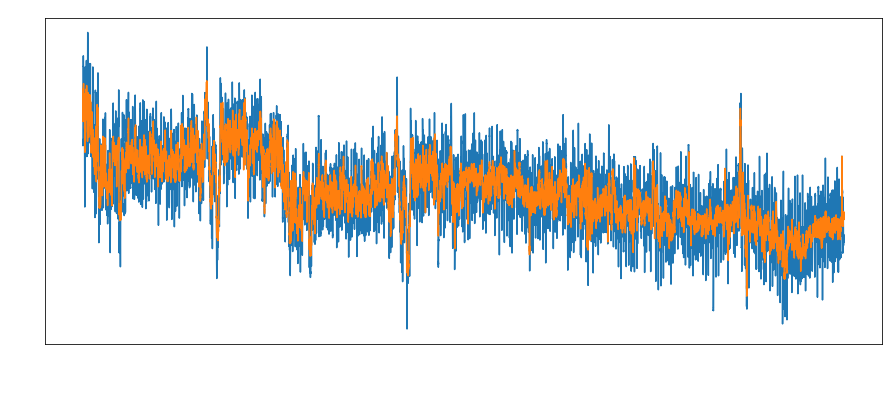

In [224]:

plot(t[:int(5*fs)],poly_z[:int(5*fs)]-z_vib)
plot(t[:int(5*fs)],poly_z[:int(5*fs)])
tick_params(labelsize=12,colors='white')
xlabel('Frequency (Hz)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
# legend(fontsize=12)

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


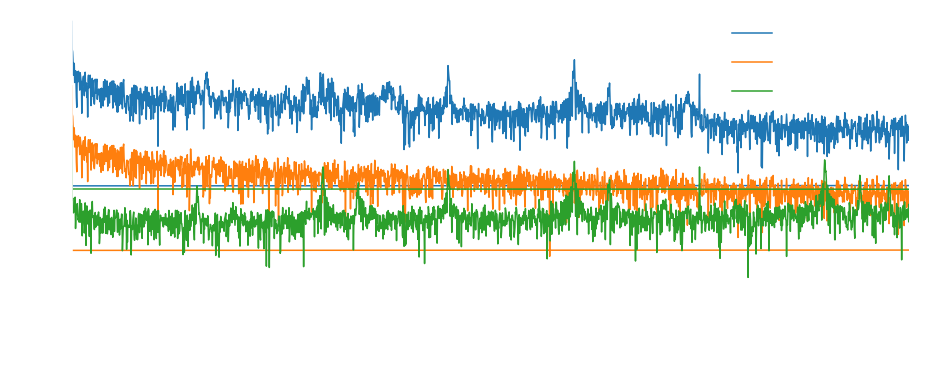

In [225]:
fig,ax = plt.subplots(1,1)
ax.semilogy(omega,absolute(fft.fft(poly_z[:int(5*fs)]-z_vib)),label='Tip after')
ax.semilogy(omega,1e-2*absolute(fft.fft(poly_z[:int(5*fs)])),label='Tip before')
ax.semilogy(omega,1e-12*absolute(fft.fft(geo[:int(5*fs)])),label='Geophone')
# ax[1].semilogy(fftfreq,absolute(C[:,0]),label='transfer function')
ax.tick_params(labelsize=12,colors='white')
# ax[1].tick_params(labelsize=12,colors='white')
ax.set_xlabel('Frequency (Hz)',size=20,color='white')
ax.set_ylabel('Amplitude',size=20,color='white')
# ax[1].set_xlabel('Frequency (Hz)',size=20,color='white')
# ax[1].set_ylabel('Amplitude',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
leg = legend(fontsize = 20,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'w')
# ax.legend(fontsize=12)
# ax[1].legend(fontsize=12)
ax.set_xlim(0,400)
# ax[1].set_xlim(0,400)
savefig('Test Data',transparent=True)

Text(0, 0.5, 'Amplitude')

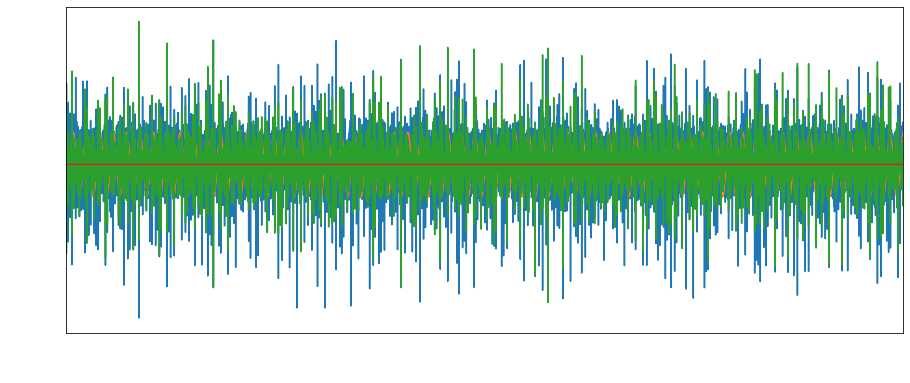

In [226]:
plot(t[:loc[0]],geo_clip[:loc[0]])
plot(t[:loc[0]],chirp_clip[:loc[0]])
locked = geo_clip[:loc[0]]*(cos(50*2*pi*t[:loc[0]])+1j*sin(50*2*pi*t[:loc[0]]))
sos = signal.butter(10, 50/5, 'lowpass', fs=fs, output='sos')

filt_tip = signal.sosfilt(sos,locked)
lock_tip = average(filt_tip)
plot(t[:loc[0]],locked)
plot(t[:loc[0]],repeat(lock_tip,len(locked)))
xlim(0,1.25)
tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')

(-0.0001, 0.0006)

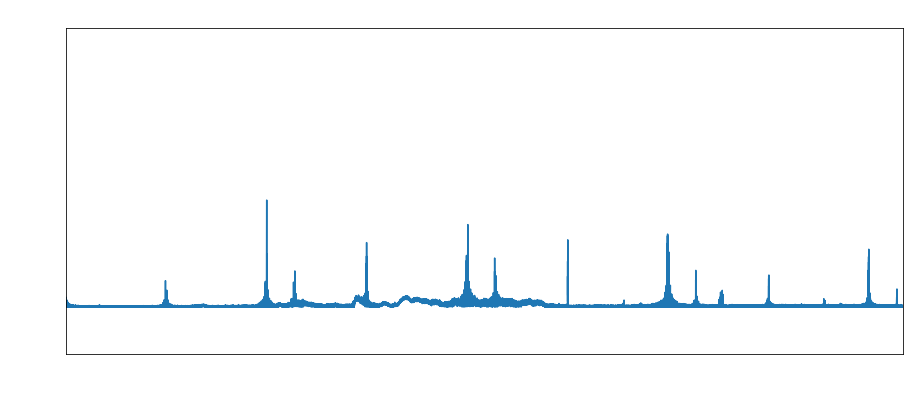

In [227]:
freqs = fft.fftfreq(len(geo),1/20000)
geo_ft = fft.fft(geo-mean(geo))/len(geo)
plot(freqs[:int(len(freqs)/2)],absolute(geo_ft[:int(len(freqs)/2)]))
tick_params(labelsize=12,colors='white')
xlabel('Frequency (Hz)',size=20,color='white')
title('Geophone frequency signature',size=20,color='white')
xlim(0,500)
ylim(-1e-4,6e-4)

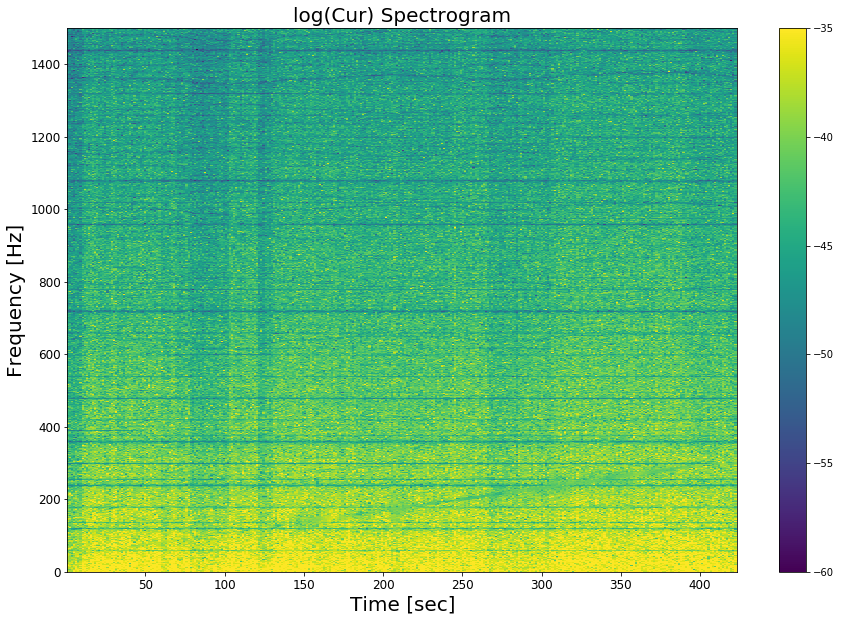

In [13]:
fig,ax =subplots(1,1,figsize=(15,10))
f, t, Sxx = signal.spectrogram(poly_z, fs,nperseg=30000)
_,__,Sxx2 = signal.spectrogram(geo,fs,nperseg=30000)
im1 = ax.pcolormesh(t,f,log(Sxx/Sxx2),vmin=-60,vmax = -35)
colors= 'k'
tick_params(labelsize=12,colors=colors)
ax.set_title('log(Cur) Spectrogram',size=20,color=colors)
ax.set_ylabel('Frequency [Hz]',size=20,color=colors)
ax.set_xlabel('Time [sec]',size=20,color=colors)
ax.set_ylim(0,1500)
# xlim(395,420)
fig.colorbar(im1)

# savefig('log(Cur) Spectrogram log',transparent=True)

In [324]:
t = linspace(0,10,100000)
w = 5
integ_loc = (arange(20)+1)*10000

test = np.zeros(1000,dtype='complex128')
print(shape(test))
for j in arange(1000):
    in_noise = sin(5*2*pi*t) + 1*np.random.random(len(t))
    out_noise = 3*(sin(5*2*pi*t) + 1*np.random.random(len(t)))
    ref = cos(w*2*pi*t)-1j*sin(w*2*pi*t)

    ref_in = ref*in_noise
    ref_out = ref*out_noise

    sos = signal.butter(10, w/5, 'lowpass', fs=10000, output='sos')

    filt_in = signal.sosfilt(sos,ref_in)
    filt_out = signal.sosfilt(sos,ref_out)


    lock_in = average(filt_in)
    lock_out = average(filt_out)
    Z = lock_out/lock_in
    test[j] = Z
plot(test)
plot(3*np.ones(len(test)))

(1000,)


KeyboardInterrupt: 

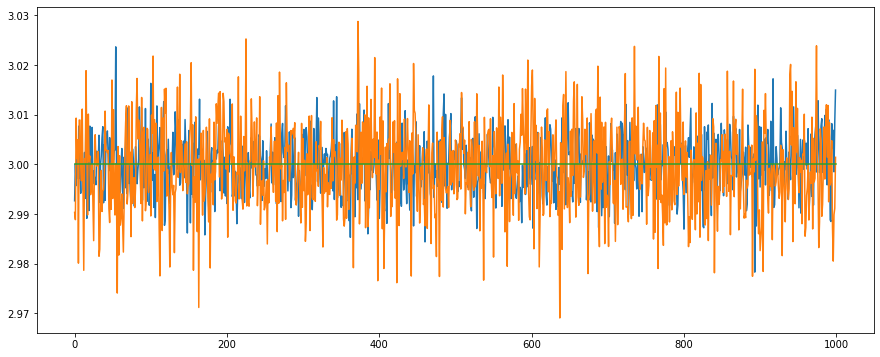

In [150]:
t = linspace(0,10,100000)
w = 5
integ_loc = (arange(10)+1)*10000

Z = np.zeros(len(integ_loc),dtype='complex128')

test2 = np.zeros(1000,dtype='complex128')
for j in arange(1000):
    prev = 0
    for i,loc in enumerate(integ_loc):
        t_split = t[prev:loc]
        in_noise = sin(5*2*pi*t_split) + 1*np.random.random(len(t_split))
        out_noise = 3*(sin(5*2*pi*t_split) + 1*np.random.random(len(t_split)))
        ref = cos(w*2*pi*t_split)-1j*sin(w*2*pi*t_split)
        ref_in = ref*in_noise
        ref_out = ref*out_noise
        sos = signal.butter(10, w/5, 'lowpass', fs=10000, output='sos')

        filt_in = signal.sosfilt(sos,ref_in)
        filt_out = signal.sosfilt(sos,ref_out)


        lock_in = average(filt_in)
        lock_out = average(filt_out)
        Z[i] = lock_out/lock_in
        prev = loc
    test2[j] = average(Z)
plot(test)
plot(test2)
plot(3*np.ones(len(test)))

In [151]:
print(absolute(sqrt(mean(test**2))),absolute(sqrt(mean(test2**2))))

2.9998668812133644 2.9993238191595903


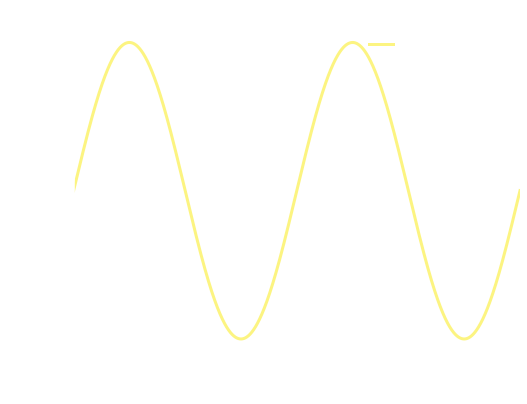

In [8]:
figsize(8,6)
t = linspace(0,10,1000000)
w = 30
fig,ax = subplots(1,1)
first = sin(w*2*pi*t)
second = 0.5*sin(2*w*2*pi*t)
third = 0.3333*sin(3*w*2*pi*t)
fourth = 0.2222*sin(4*w*2*pi*t)
fifth = 0.2*sin(5*w*2*pi*t)
sixth = 0.166666667*sin(6*w*2*pi*t)
seventh = 0.1428571429*sin(7*w*2*pi*t)
plot(t,first,linewidth=3,color='#fcf481',label='Fundamental       ')
# plot(t,second,linewidth=3,color='#ffef00',label='Second harmonic')
# plot(t,third,linewidth=3,color='#b3b412',label='Third harmonic')
# plot(t,fourth,linewidth=3,label='40 Hz fourth harmonic')
# plot(t,fifth,linewidth=3,label='50 Hz fifth harmonic')
# plot(t,sixth,linewidth=3,label='60 Hz sixth harmonic')
# plot(t,seventh,linewidth=3,label='70 Hz seventh harmonic')


tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Tip Position (pm)',size = 20,color='white')
title('Harmonics',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')
xlim(0,0.066667)
leg = legend(loc=1,fontsize = 12,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'w')
savefig('first harmonic.png',transparent = True)

No handles with labels found to put in legend.
C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


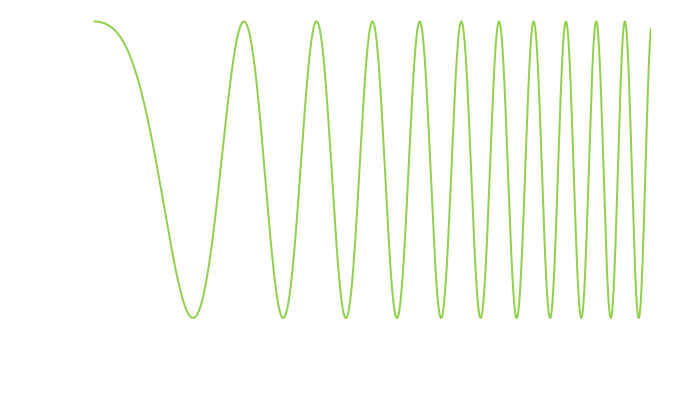

In [9]:
figsize(10,6)
y = signal.chirp(t,1,10,200)
fig,ax =subplots(1,1)
plot(t,y,linewidth=2,color='#92d050')
tick_params(labelsize=20,colors='white')
xlabel('Time (secs)',size=26,color='white')
ylabel('Geophone position (mV)',size=26,color='white')
# title('Frequency Chirp',size=20,color='white')
xlim(0,1)
for spine in ax.spines.values():
    spine.set_edgecolor('white')

leg = legend(fontsize = 12,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'w')
savefig('Frequency Chirp',transparent = True)


In [308]:
folder_loc = 'Chirp Data/JG_GS/'
file_loc = '20-02-19_JG_GS_00002.dat'
dat = np.loadtxt(folder_loc+file_loc,skiprows=110)
freq_gen = dat[:,0]
timestamp = dat[:,1]
current = dat[:,2]
z = dat[:,3]
output2 = dat[:,4]
geo = dat[:,5]
LIX = dat[:,6]
LIY = dat[:,7]
LIR = dat[:,8]
LIX2 = dat[:,9]
LIY2 = dat[:,10]
LIR2 = dat[:,11]

folder_loc = 'Chirp Data/JG_GS/'
file_loc = '20-02-19_JG_GS_00003.dat'
dat = np.loadtxt(folder_loc+file_loc,skiprows=110)
freq_gen2 = dat[:,0]
timestam2 = dat[:,1]
current2 = dat[:,2]
z2 = dat[:,3]
output22 = dat[:,4]
geo2 = dat[:,5]
LIX2 = dat[:,6]
LIY2 = dat[:,7]
LIR2 = dat[:,8]
LIX22 = dat[:,9]
LIY22 = dat[:,10]
LIR22 = dat[:,11]
# print(dat)
# for filename in os.listdir(folder_loc):
#     if filename == file_loc:
#         continue
#     try:
#         print(4)
#         tempdata = np.loadtxt(folder_loc+filename, skiprows=110)
#         print(2)
#         print(shape(dat),shape(tempdata))
#         dat = np.concatenate((dat,tempdata))
#         print(filename,end='\r')
#     except:
#         print('ERROR: ',filename)

0.0 0.015999999999849024
50.0 50.099998


(48, 55)

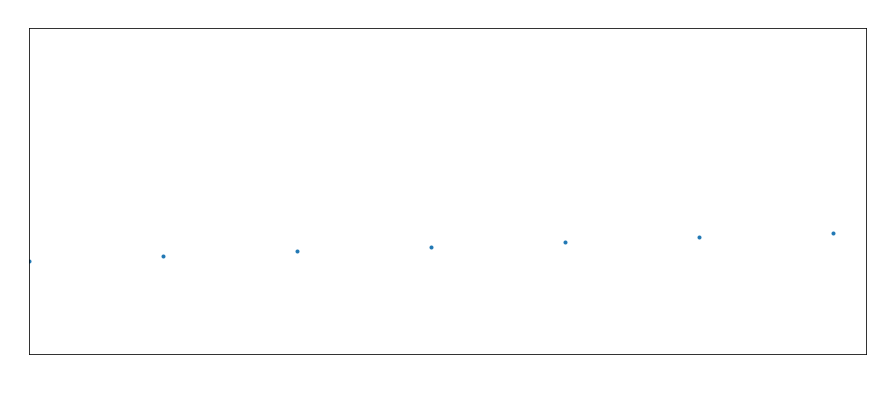

In [176]:
times = timestamp*1e-4-timestamp[0]*1e-4
plot(times,freq_gen,'.')
tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
title('Frequency Chirp',size=20,color='white')
xlim(0,0.1)
print(times[0],times[1])
print(freq_gen[0],freq_gen[1])
ylim(48,55)

Text(0.5, 1.0, 'Z GS data')

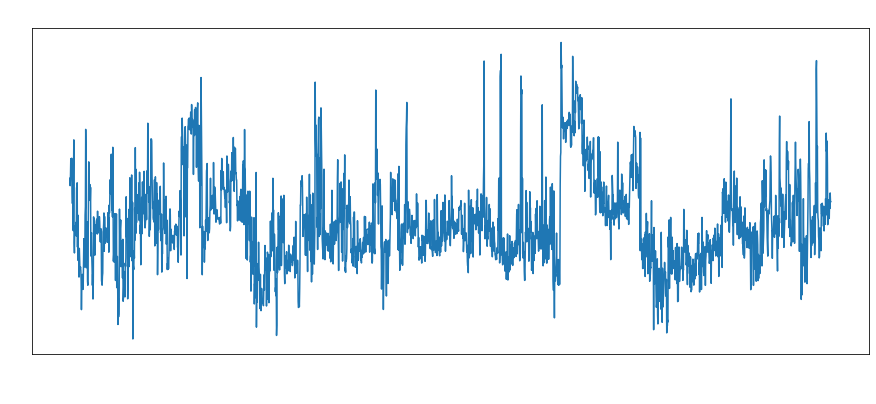

In [177]:
# plot(freq_gen,z)
fitted = poly1d(polyfit(freq_gen,z,4))
# plot(freq_gen,fitted(freq_gen))
drift_removed = z-fitted(freq_gen)
plot(freq_gen,drift_removed)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Z GS data',size=20,color='white')

Text(0.5, 1.0, 'Current GS data')

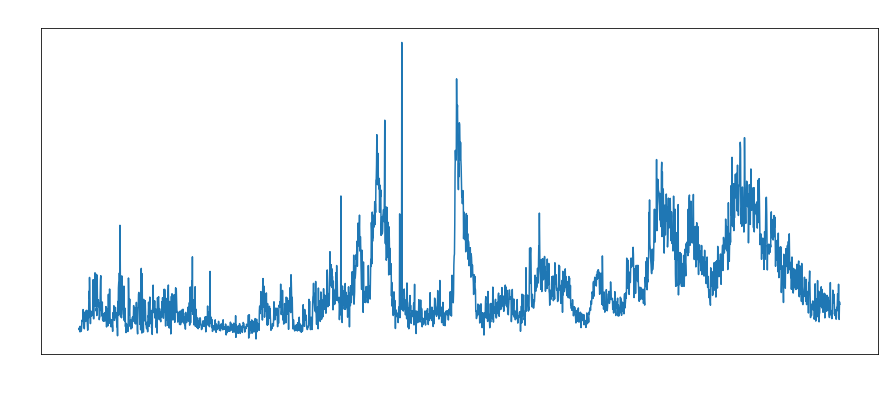

In [178]:
plot(freq_gen,current)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Current GS data',size=20,color='white')

Text(0.5, 1.0, 'Output2 GS data')

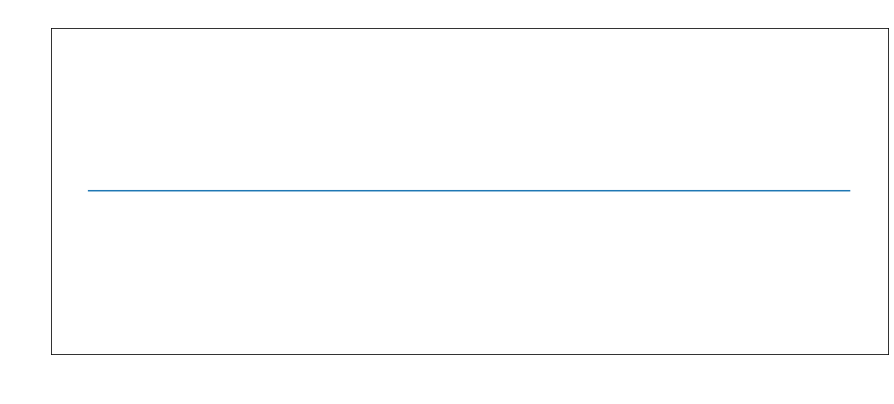

In [179]:
plot(freq_gen,output2)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Output2 GS data',size=20,color='white')

Text(0.5, 1.0, 'Geophone GS data')

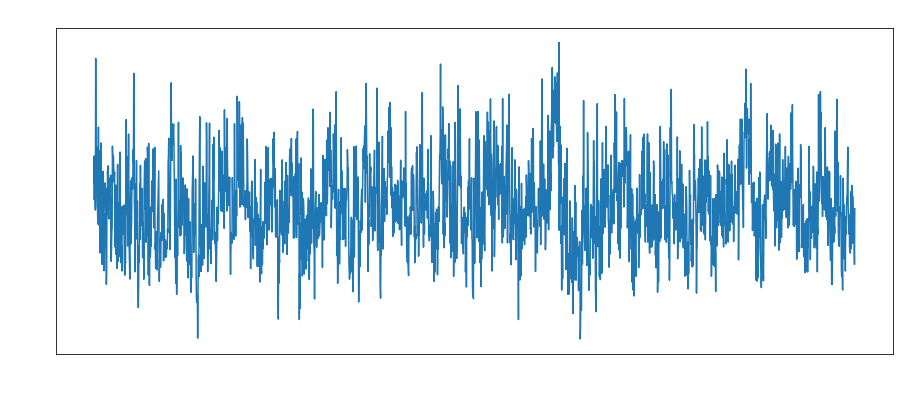

In [180]:
plot(freq_gen,geo)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Geophone GS data',size=20,color='white')

(50, 300)

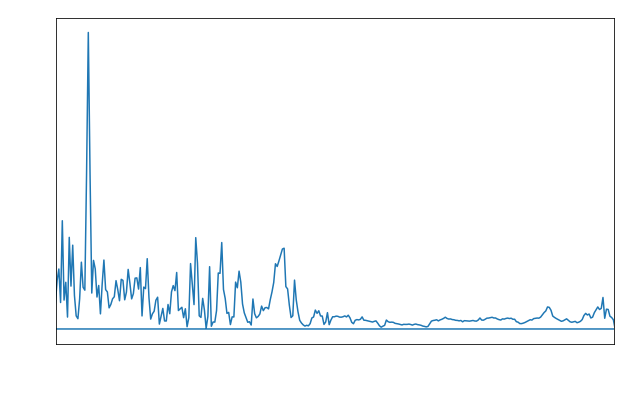

In [307]:
plot(fftfreq,absolute(C[:,0]))
# semilogy(fftfreq,absolute(C[:,1]))
# semilogy(fftfreq,absolute(C[:,2]))
# semilogy(fftfreq,absolute(C[:,3]))
tick_params(labelsize=12,colors='white')
xlabel('Frequency (Hz)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
xlim(50,300)

Text(0.5, 1.0, 'Lock In demod R GS data')

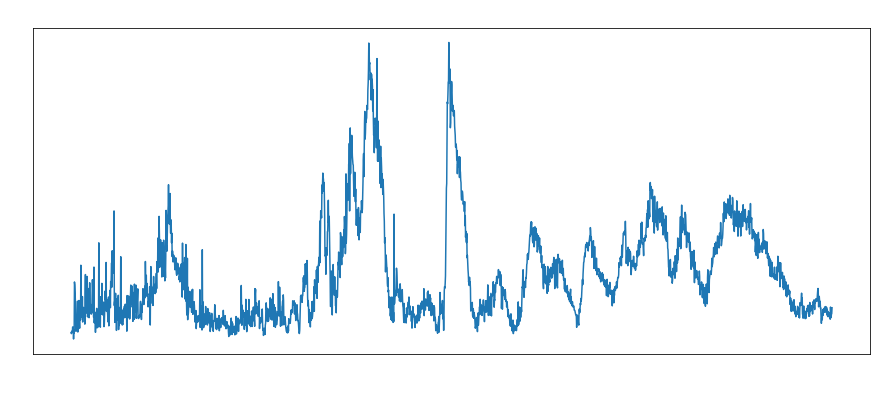

In [181]:
plot(freq_gen,LIR)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Lock In demod R GS data',size=20,color='white')

In [ ]:
plot(freq_gen,LIR)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Lock In demod R GS data',size=20,color='white')

Text(0.5, 1.0, 'Lock In demod R 2 GS data')

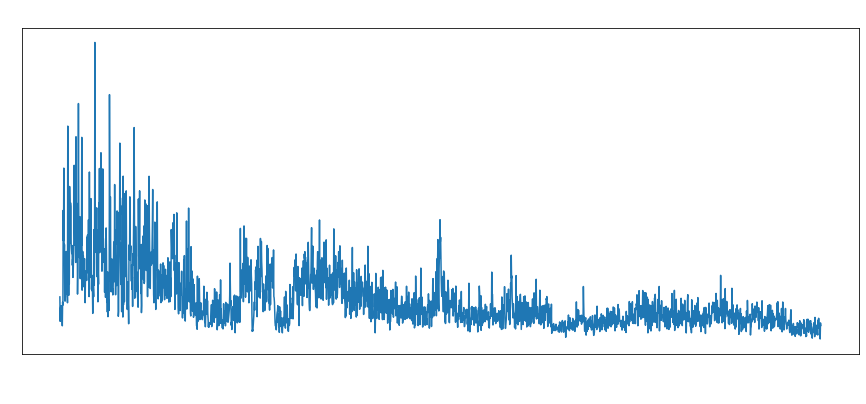

In [182]:
plot(freq_gen,LIR2)
tick_params(labelsize=12,colors='white')
xlabel('Frequency Response (Hz)',size=20,color='white')
title('Lock In demod R 2 GS data',size=20,color='white')

In [2]:
folder_loc = '2020-02-28/Run 2/'
file_loc = '2020-02-28-17-05_JG_DL_Run2_001.dat'
dat = np.loadtxt(folder_loc+file_loc,skiprows=76)

for filename in os.listdir(folder_loc):
    if filename == file_loc:
        pass
    try:
        tempdata = np.loadtxt(folder_loc+filename, skiprows=76)
        dat = np.concatenate((dat,tempdata))
        print(filename,end='\r')
    except:
        print('ERROR: ',filename)

In [3]:
current = dat[:,0]
chirp = dat[:,1]
geo = dat[:,2]
tip = dat[:,3]

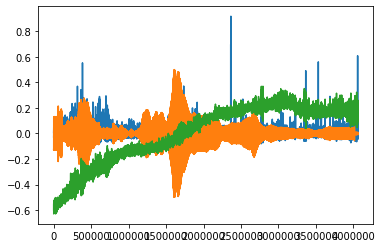

In [4]:
def normalize2(array):
    return (array-mean(array))/(max(array) - min(array))
plot(normalize2(current))
plot(normalize2(geo))
plot(normalize2(tip))

4062100 4062100
Logistic curve fit: 0.0
polynomial curve fit: 0.7402162551879883


Text(0, 0.5, 'Amplitude')

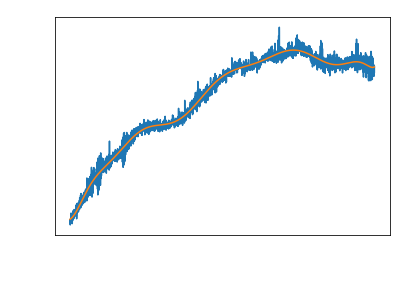

In [5]:
def logistic(x, L, k, x0, c):
    return L / (1 + np.exp(-k*(x-x0))) + c
fs =5000
t = linspace(0,len(dat[:,0])/fs,len(dat[:,0]))
y = (tip-mean(tip))*1e12
print(len(t),len(y))
p0 = array([1000, 0.01, 0, -800])
t1 = time.time() 
# pf = stmpy.tools.curve_fit(logistic, t[::600], y[::600], p0=p0)
t2 = time.time()
polyfitted = poly1d(polyfit(t[::600],tip[::600]-mean(tip[::600]),15))
t3 = time.time()
print('Logistic curve fit:',t2-t1)
print('polynomial curve fit:',t3-t2)

plot(t[::600], tip[::600]-mean(tip[::600]))
# plot(t[::600], logistic(t[::600], *pf))
plot(t,polyfitted(t))
tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')

Text(0, 0.5, 'Z (pm)')

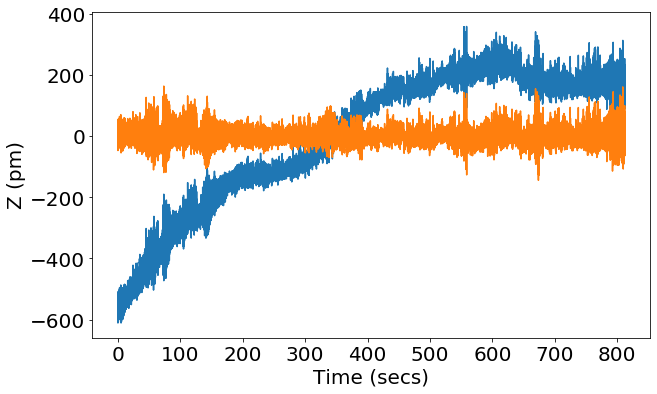

In [6]:
figsize(10,6)
# new_data = y - logistic(t, *pf)
poly_z = tip-mean(tip)-polyfitted(t)
# plot(t, new_data)
plot(t,(tip-mean(tip))*1e12,label='Raw')
plot(t,poly_z*1e12,label='Processed')

# plot(t[::600], logistic(t[::600], *pf))
# xlim(0,6)
tick_params(labelsize=20,colors='black')
xlabel('Time (secs)',size=20,color='black')
ylabel('Z (pm)',size=20,color='black')
# legend(fontsize=20)
# savefig('Stop piezo drift 2020-2-28.png')

4062100


(-1, 1)

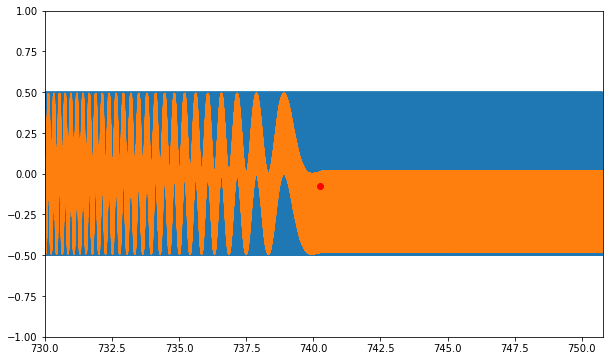

In [7]:
x = t
dx = x[1]-x[0]
y = chirp
dydx = numpy.gradient(y, dx)
# print(freq_map[1]-50)
# plot(t,normalize2(chirp)+sin(400*2*pi*t))
plot(t,sin(50.14589412255106*2*pi*t+0.648*pi)*0.5)
plot(t,normalize2(chirp)*sin(400*2*pi*t))
# plot(t,normalize2(chirp)-sin(50.14589412255106*2*pi*t+0.63*pi)*0.5)
# plot(t,normalize2(chirp))#*sin((freq_map[-3])*2*pi*t))

# print(freq_map[1])
print(len(t))
plot(t[3701250],normalize2(chirp)[3701250],'ro')
# plot(t,normalize2(chirp)*sin((50.5)*2*pi*t))
# plot(t,normalize2(dydx))
short = 398
xlim(730,750.785)
ylim(-1,1)

In [8]:
start = int(10.45*fs)
end = int(740.55*fs)
chirp_clip = chirp[start:end+1]
current_clip = current[start:end+1]-mean(current[start:end+1])
geo_clip = geo[start:end+1]-mean(geo[start:end+1])
tip_clip = poly_z[start:end+1]

In [9]:
figsize(15,6)
t = linspace(0,len(current_clip)/fs,len(current_clip))
seperation = 0.3
change_loc = linspace(0.3,729.5,2399)
loc = (change_loc*fs).astype('int')
freq_map = linspace(50.14589412255106282,400,2399)
print(freq_map[0]-50,'hz resolution')
# plot(t,normalize2(chirp_clip)-sin(50*2*pi*t+0.77*pi)*0.5)
# plot(t[loc[1]],chirp_clip[loc[1]],'.')
# plot(t,sin(50*2*pi*t+0.77*pi)*0.5)
# plot(t,ploy)
# xlim(0.2,0.4)

# plot()

0.14589412255106282 hz resolution


In [10]:
def coef(w,geo,tip,t_array,harmonic,fs=1000):
    
    if w*harmonic >= fs/2:
        return 0 + 0*1j
    
    ref_tip = tip*(np.cos(w*harmonic*2*pi*t_array)-1j*sin(w*harmonic*2*pi*t_array)) 
    ref_geo = geo*(np.cos(w*2*pi*t_array)-1j*sin(w*2*pi*t_array))
    
    sos = signal.butter(10, w/5, 'lowpass', fs=fs, output='sos')
    
    filt_tip = signal.sosfilt(sos,ref_tip)
    filt_geo = signal.sosfilt(sos,ref_geo)
    
    
    lock_tip = average(filt_tip)
    lock_geo = average(filt_geo)
    Z = lock_tip/lock_geo
    
    return Z

prev = 0
harmonics = 10

fftfreq = fft.fftfreq(int(fs/(freq_map[0]-50)),1/fs)
print(fftfreq[343])
print(fftfreq[3839])
print(fftfreq[1])
C = np.zeros((len(fftfreq),harmonics),dtype='complex128')
C_cur = np.zeros((len(fftfreq),harmonics),dtype='complex128')

for w,point,i in zip(freq_map,loc,arange(len(freq_map))):
    i = i+343
    print(w,end='\r')
    input_wave = geo_clip[prev:point]
    output_wave = tip_clip[prev:point]
    output_wave_cur = current_clip[prev:point]
    t_split = t[prev:point]
    for j in arange(harmonics):
        C[i,j] = coef(w,input_wave,output_wave,t_split,(j+1),fs = 5000)
        C_cur[i,j] = coef(w,input_wave,output_wave_cur,t_split,(j+1),fs = 5000)

    prev = point
C[int(len(C[:,0])/2)+1:,:] = flip(conj(C[1:int(len(C[:,0])/2)+1]),axis=0)
C_cur[int(len(C[:,0])/2)+1:,:] = flip(conj(C_cur[1:int(len(C[:,0])/2)+1]),axis=0)

50.042309824633065
560.0945405736628
0.14589594701059203


In [11]:
C1 = scipy.interpolate.interp1d(fftfreq,C[:,0], kind='linear',fill_value='extrapolate')
C2 = scipy.interpolate.interp1d(fftfreq,C[:,1], kind='linear',fill_value='extrapolate')
C3 = scipy.interpolate.interp1d(fftfreq,C[:,2], kind='linear',fill_value='extrapolate')
C4 = scipy.interpolate.interp1d(fftfreq,C[:,3], kind='linear',fill_value='extrapolate')
C5 = scipy.interpolate.interp1d(fftfreq,C[:,4], kind='linear',fill_value='extrapolate')
C6 = scipy.interpolate.interp1d(fftfreq,C[:,5], kind='linear',fill_value='extrapolate')
C7 = scipy.interpolate.interp1d(fftfreq,C[:,6], kind='linear',fill_value='extrapolate')
C8 = scipy.interpolate.interp1d(fftfreq,C[:,7], kind='linear',fill_value='extrapolate')
C9 = scipy.interpolate.interp1d(fftfreq,C[:,8], kind='linear',fill_value='extrapolate')
C10 = scipy.interpolate.interp1d(fftfreq,C[:,9], kind='linear',fill_value='extrapolate')

C1_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,0], kind='linear',fill_value='extrapolate')
C2_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,1], kind='linear',fill_value='extrapolate')
C3_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,2], kind='linear',fill_value='extrapolate')
C4_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,3], kind='linear',fill_value='extrapolate')
C5_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,4], kind='linear',fill_value='extrapolate')
C6_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,5], kind='linear',fill_value='extrapolate')
C7_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,6], kind='linear',fill_value='extrapolate')
C8_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,7], kind='linear',fill_value='extrapolate')
C9_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,8], kind='linear',fill_value='extrapolate')
C10_cur = scipy.interpolate.interp1d(fftfreq,C_cur[:,9], kind='linear',fill_value='extrapolate')

(50, 300)

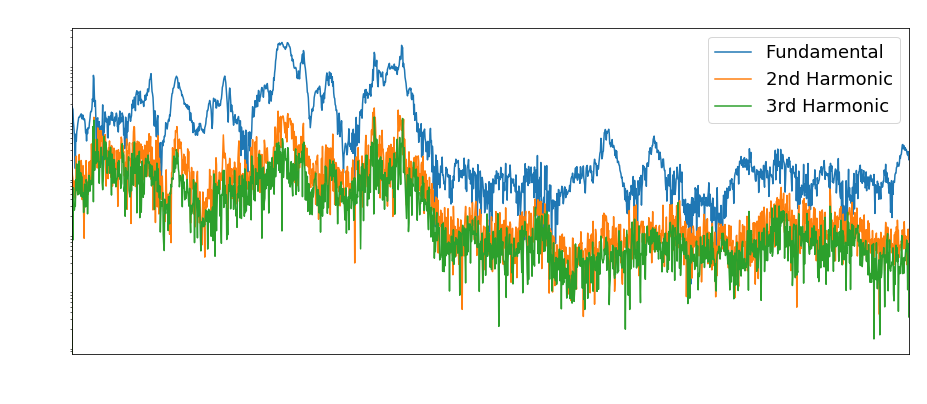

In [12]:
semilogy(fftfreq,absolute(C[:,0]),label='Fundamental')
semilogy(fftfreq,absolute(C[:,1]),label='2nd Harmonic')
semilogy(fftfreq,absolute(C[:,2]),label='3rd Harmonic')
# semilogy(fftfreq,absolute(C[:,3]))
tick_params(labelsize=12,colors='white')
title('Z Harmonics',size=20,color='white')
xlabel('Frequency (Hz)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
legend(fontsize=18)
xlim(50,300)
# savefig('Transfer Function')

(50, 300)

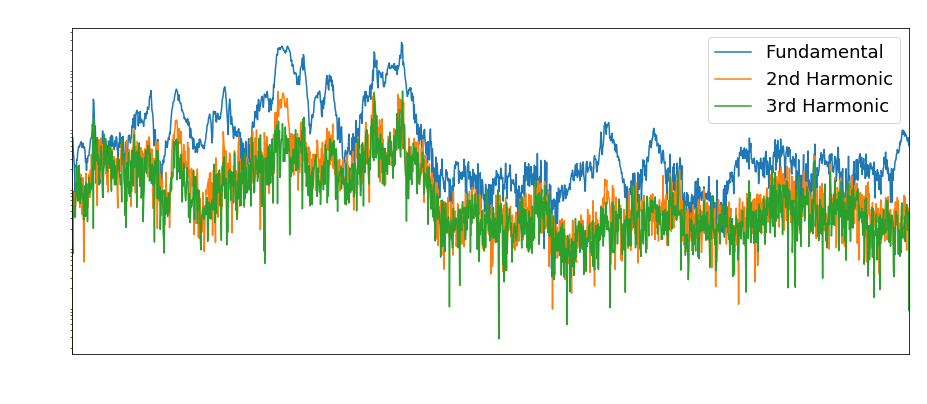

In [13]:
semilogy(fftfreq,absolute(C_cur[:,0]),label='Fundamental')
semilogy(fftfreq,absolute(C_cur[:,1]),label='2nd Harmonic')
semilogy(fftfreq,absolute(C_cur[:,2]),label='3rd Harmonic')
# semilogy(fftfreq,absolute(C[:,3]))
tick_params(labelsize=12,colors='white')
title('Current Harmonics',size=20,color='white')
xlabel('Frequency (Hz)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
legend(fontsize=18)
xlim(50,300)
# savefig('Transfer Function')

In [14]:
G = fft.fft(geo[int(0*fs):int(100*fs)])
omega = fft.fftfreq(len(geo[int(0*fs):int(100*fs)]),1/5000)
G = scipy.interpolate.interp1d(omega,G,kind='linear',fill_value='extrapolate')

In [15]:
z_omega = (C1(omega)*G(omega) + C2(omega/2)*G(omega/2) + C3(omega/3)*G(omega/3) +
           C4(omega/4)*G(omega/4))
i_omega = (C1_cur(omega)*G(omega) + C2_cur(omega/2)*G(omega/2) + C3_cur(omega/3)*G(omega/3) +
           C4_cur(omega/4)*G(omega/4))
z_vib = fft.ifft(z_omega)
i_vib = fft.ifft(i_omega)

C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

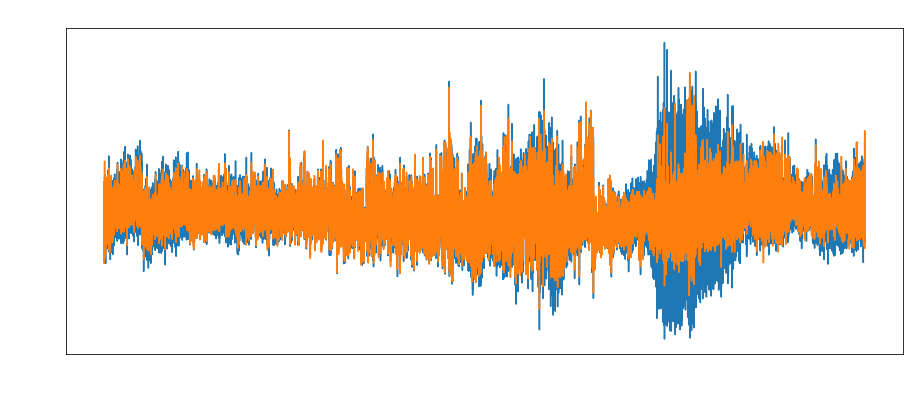

In [16]:

# print(len(pol))
t = linspace(0,100,500000)
plot(t,poly_z[int(0*fs):int(100*fs)])
plot(t,poly_z[int(0*fs):int(100*fs)]-z_vib)
tick_params(labelsize=12,colors='white')
title('Z position',size=20,color='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
# legend(fontsize=12)

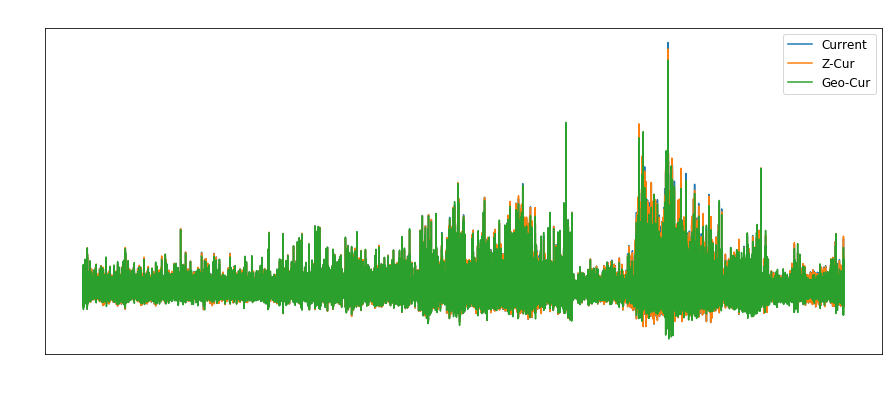

In [17]:
# print(len(pol))
i_exp = exp(-(z_vib-mean(z_vib))*(-1e9))
plot(t,current[int(0*fs):int(100*fs)],label='Current')
plot(t,current[int(0*fs):int(100*fs)]/i_exp,label='Z-Cur')
plot(t,current[int(0*fs):int(100*fs)]-i_vib,label='Geo-Cur')
# plot(absolute(i_exp))
tick_params(labelsize=12,colors='white')
title('Current',size=20,color='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')
legend(loc=1,fontsize=12)
# legend(fontsize=12)

In [18]:
# raw =(sqrt(mean(poly_z[int(0*fs):int(10*fs)]**2)))
# processed = (absolute(sqrt(mean((poly_z[int(0*fs):int(10*fs)]-(z_vib))**2))))
# print(1-processed/raw)

(0, 210)

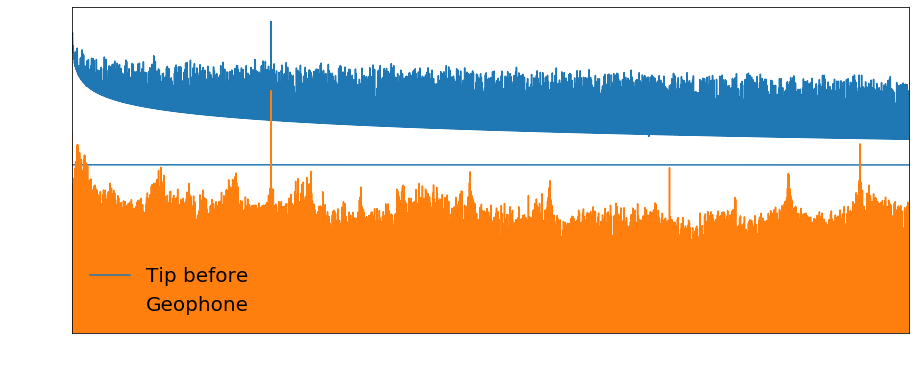

In [19]:
fig,ax = plt.subplots(1,1)
omega = fft.fftfreq(len(geo[int(0*fs):int(10*fs)]),1/5000)
ax.semilogy(omega,absolute(fft.fft(poly_z[int(0*fs):int(10*fs)])),label='Tip before')
# ax.semilogy(omega,absolute(fft.fft(poly_z[int(0*fs):int(10*fs)]-z_vib)),label='Tip after')
ax.semilogy(omega,1e-12*absolute(fft.fft(geo[int(0*fs):int(10*fs)])),label='Geophone')
# ax[1].semilogy(fftfreq,absolute(C[:,0]),label='transfer function')
ax.tick_params(labelsize=12,colors='white')
# ax[1].tick_params(labelsize=12,colors='white')
ax.set_xlabel('Frequency (Hz)',size=20,color='white')
ax.set_ylabel('Amplitude',size=20,color='white')
# ax[1].set_xlabel('Frequency (Hz)',size=20,color='white')
# ax[1].set_ylabel('Amplitude',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('k')
leg = legend(fontsize = 20,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'k')
# ax.legend(fontsize=12)
# ax[1].legend(fontsize=12)
ax.set_xlim(0,210)
# ax[1].set_xlim(0,400)
# savefig('Test Data',transparent=True)

(0, 270)

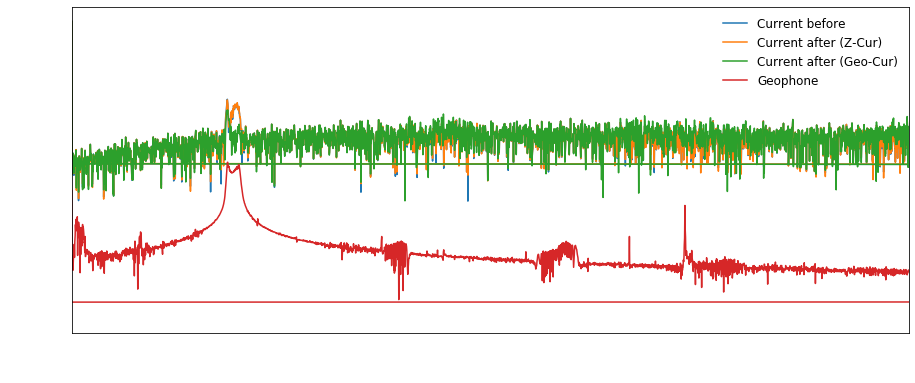

In [20]:
fig,ax = plt.subplots(1,1,figsize=(15,6))
omega = fft.fftfreq(len(geo[int(0*fs):int(10*fs)]),1/5000)
ax.semilogy(omega,absolute(fft.fft(current[int(10*fs):int(20*fs)])),label='Current before')
ax.semilogy(omega,absolute(fft.fft(current[int(10*fs):int(20*fs)]/i_exp[int(10*fs):int(20*fs)])),label='Current after (Z-Cur)')
ax.semilogy(omega,absolute(fft.fft(current[int(10*fs):int(20*fs)] - i_vib[int(10*fs):int(20*fs)])),label='Current after (Geo-Cur)')
ax.semilogy(omega,1e-12*absolute(fft.fft(geo[int(10*fs):int(20*fs)])),label='Geophone')
# ax[1].semilogy(fftfreq,absolute(C[:,0]),label='transfer function')
ax.tick_params(labelsize=12,colors='white')
# ax[1].tick_params(labelsize=12,colors='white')
ax.set_xlabel('Frequency (Hz)',size=20,color='white')
ax.set_ylabel('Amplitude',size=20,color='white')
# ax[1].set_xlabel('Frequency (Hz)',size=20,color='white')
# ax[1].set_ylabel('Amplitude',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('k')
leg = legend(loc=1,fontsize = 12,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'k')
# ax.legend(fontsize=12)
# ax[1].legend(fontsize=12)
ax.set_xlim(0,270)
# ax[1].set_xlim(0,400)
# savefig('Test Data',transparent=True)

In [21]:
folder_loc = '2020-02-28/Run 1/'
file_loc = '2020-02-28-17-01_JG_DL_Run1_001.dat'
dat = np.loadtxt(folder_loc+file_loc,skiprows=76)

for filename in os.listdir(folder_loc):
    if filename == file_loc:
        pass
    try:
        tempdata = np.loadtxt(folder_loc+filename, skiprows=76)
        dat = np.concatenate((dat,tempdata))
        print(filename,end='\r')
    except:
        print('ERROR: ',filename)

In [22]:
current_test = dat[:,0]
# chirp_test = dat[:,1]
geo_test = dat[:,2]
tip_test = dat[:,3]

669700 4062100
Logistic curve fit: 0.0
polynomial curve fit: 0.000997304916381836


Text(0, 0.5, 'Amplitude')

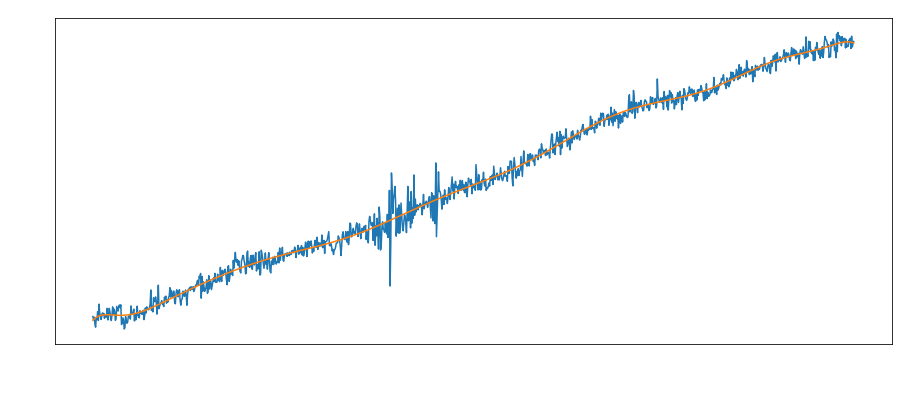

In [23]:
def logistic(x, L, k, x0, c):
    return L / (1 + np.exp(-k*(x-x0))) + c
fs =5000
t = linspace(0,len(dat[:,0])/fs,len(dat[:,0]))
y = (tip-mean(tip))*1e12
print(len(t),len(y))
p0 = array([1000, 0.01, 0, -800])
t1 = time.time() 
# pf = stmpy.tools.curve_fit(logistic, t[::600], y[::600], p0=p0)
t2 = time.time()
polyfitted = poly1d(polyfit(t[::600],tip_test[::600]-mean(tip_test[::600]),15))
t3 = time.time()
print('Logistic curve fit:',t2-t1)
print('polynomial curve fit:',t3-t2)

plot(t[::600], tip_test[::600]-mean(tip_test[::600]))
# plot(t[::600], logistic(t[::600], *pf))
plot(t,polyfitted(t))

tick_params(labelsize=12,colors='white')
xlabel('Time (secs)',size=20,color='white')
ylabel('Amplitude',size=20,color='white')

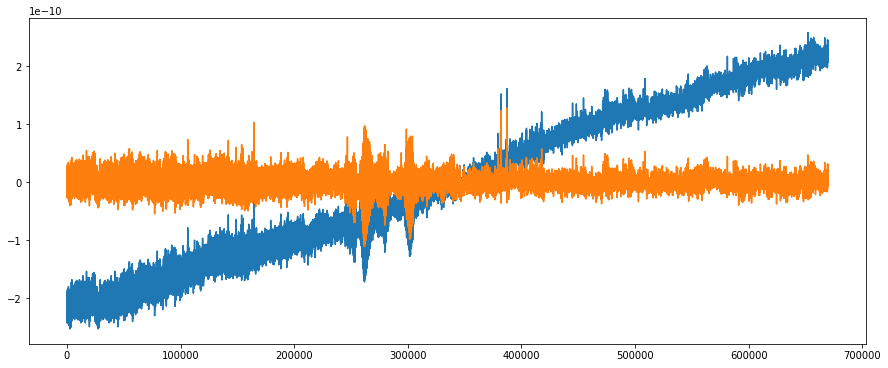

In [24]:
poly_z_test = tip_test-mean(tip_test)-polyfitted(t)
plot(tip_test-mean(tip_test))
plot(poly_z_test)

In [25]:
G = fft.fft(geo_test[int(0*fs):int(130*fs)])
omega = fft.fftfreq(len(geo_test[int(0*fs):int(130*fs)]),1/5000)
G = scipy.interpolate.interp1d(omega,G,kind='linear',fill_value='extrapolate')

In [26]:
z_omega = (C1(omega)*G(omega) + C2(omega/2)*G(omega/2) + C3(omega/3)*G(omega/3) +
           C4(omega/4)*G(omega/4))
i_omega = (C1(omega)*G(omega) + C2(omega/2)*G(omega/2) + C3(omega/3)*G(omega/3) +
           C4(omega/4)*G(omega/4))
z_omega_fund = C2(omega/2)*G(omega/2)
z_vib = fft.ifft(z_omega)
z_vib2 = fft.ifft(z_omega_fund)
i_vib = fft.ifft(i_omega)
print(shape(z_vib))

(650000,)


C:\Users\jgoet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


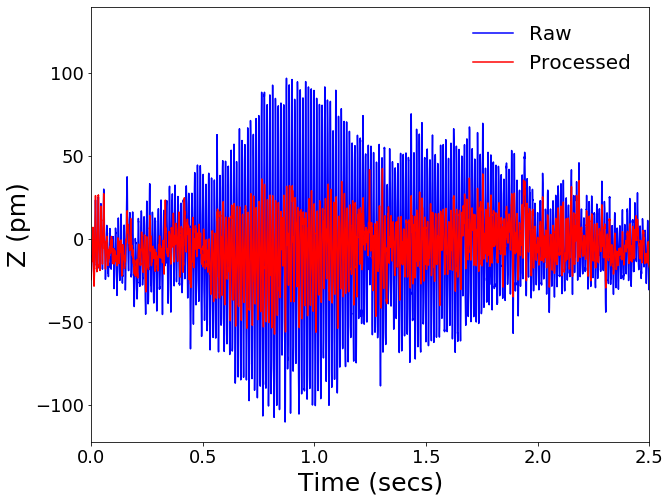

In [42]:
# print(len(pol))
figsize(10,8)
fig,ax = subplots(1,1)
t_test = linspace(0,130,130*5000)
plot(t_test-51.5,1e12*poly_z_test[int(0*fs):int(130*fs)],color='b',label='Raw')
plot(t_test-51.5,1e12*(poly_z_test[int(0*fs):int(130*fs)]-z_vib),color='r',label='Processed')

# xlim(51.5,53.5)
xlim(0,2.5)
# ylim(-50,50)
color = 'k'
tick_params(labelsize=18,colors=color)
xlabel('Time (secs)',size=25,color=color)
ylabel('Z (pm)',size=25,color=color)
for spine in ax.spines.values():
    spine.set_edgecolor('k')
leg = legend(fontsize = 20,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'black')
savefig('Matrix Cancelled.eps',transparent=False)

ValueError: x and y must have same first dimension, but have shapes (650000,) and (500000,)

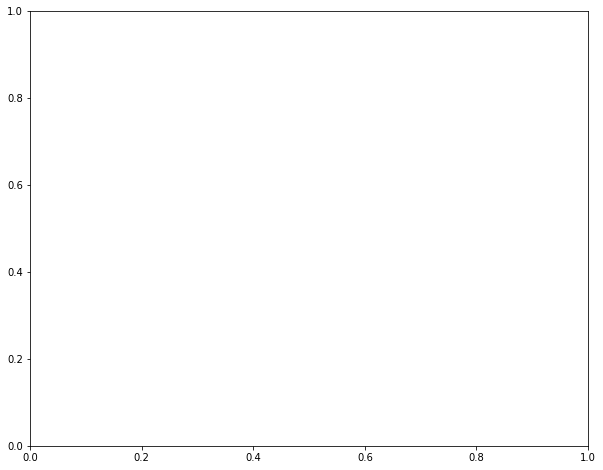

In [41]:
i_exp = exp(-(z_vib-mean(z_vib))*(-1e10))
plot(t_test,current_test[int(0*fs):int(100*fs)],color='b',label='Current')
plot(t_test,current_test[int(0*fs):int(100*fs)]/i_exp[int(0*fs):int(100*fs)],color='g',label='Z-Cur')
plot(t_test,current_test[int(0*fs):int(100*fs)]-i_vib,color='r',label='G-Cur')
legend(fontsize=20)
tick_params(labelsize=18,colors='white')
xlabel('Time (secs)',size=25,color='white')
ylabel('Z (pm)',size=25,color='white')

(0, 270)

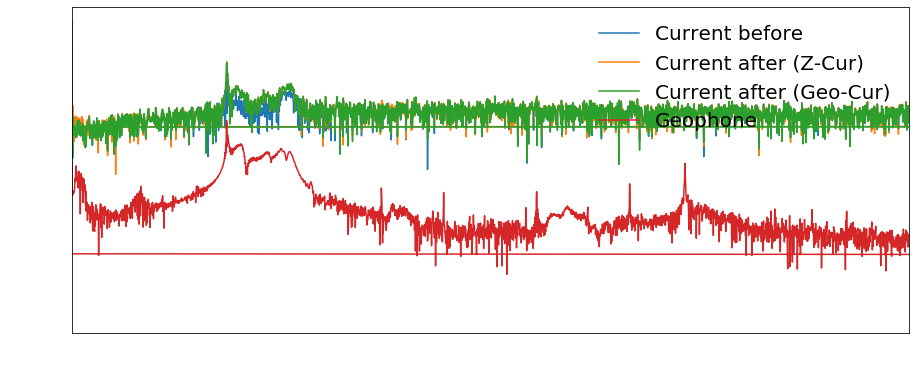

In [186]:
fig,ax = plt.subplots(1,1,figsize=(15,6))
omega = fft.fftfreq(len(geo[int(0*fs):int(10*fs)]),1/5000)
ax.semilogy(omega,absolute(fft.fft(current_test[int(40*fs):int(50*fs)])),label='Current before')
ax.semilogy(omega,absolute(fft.fft(current_test[int(40*fs):int(50*fs)]/i_exp[int(40*fs):int(50*fs)])),label='Current after (Z-Cur)')
ax.semilogy(omega,absolute(fft.fft(current_test[int(40*fs):int(50*fs)] - i_vib[int(40*fs):int(50*fs)])),label='Current after (Geo-Cur)')
ax.semilogy(omega,1e-12*absolute(fft.fft(geo_test[int(40*fs):int(50*fs)])),label='Geophone')
# ax[1].semilogy(fftfreq,absolute(C[:,0]),label='transfer function')
ax.tick_params(labelsize=12,colors='white')
# ax[1].tick_params(labelsize=12,colors='white')
ax.set_xlabel('Frequency (Hz)',size=20,color='white')
ax.set_ylabel('Amplitude',size=20,color='white')
# ax[1].set_xlabel('Frequency (Hz)',size=20,color='white')
# ax[1].set_ylabel('Amplitude',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('k')
leg = legend(loc=1,fontsize = 20,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'k')
# ax.legend(fontsize=12)
# ax[1].legend(fontsize=12)
ax.set_xlim(0,270)
# ax[1].set_xlim(0,400)
# savefig('Test Data',transparent=True)

In [145]:
raw =(sqrt(mean(poly_z_test[int(60*fs):int(61*fs)]**2)))
processed = (absolute(sqrt(mean((poly_z_test[int(60*fs):int(61*fs)]-(z_vib[int(60*fs):int(61*fs)]))**2))))
print((processed)/raw)

0.3887056271597367


ValueError: x and y must have same first dimension, but have shapes (500000,) and (5000,)

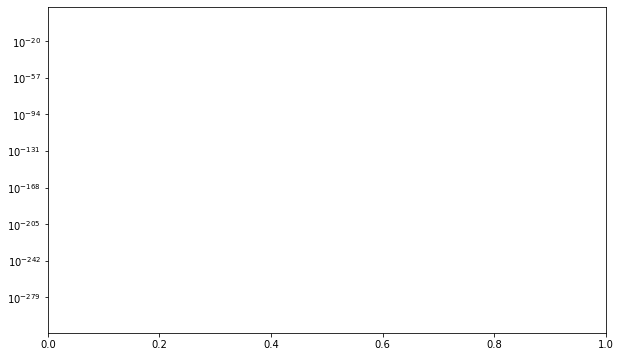

In [146]:
fig,ax = plt.subplots(1,1)
ax.semilogy(omega,absolute(fft.fft(tip_test[int(52.5*fs):int(53.5*fs)])),label='Tip before')
# ax.semilogy(omega,absolute(fft.fft(tip_test[int(60*fs):int(61*fs)]-z_vib[int(60*fs):int(61*fs)])),label='Tip after')
# ax.semilogy(omega,absolute(fft.fft(tip_test[int(60*fs):int(61*fs)]-z_vib2[int(60*fs):int(61*fs)])),label='Tip after (vector)')

ax.semilogy(omega,absolute(fft.fft(geo_test[int(52.5*fs):int(53.5*fs)])),label='Geophone')
# ax[1].semilogy(fftfreq,absolute(C[:,0]),label='transfer function')
ax.tick_params(labelsize=12,colors='black')
# ax[1].tick_params(labelsize=12,colors='white')
ax.set_xlabel('Frequency (Hz)',size=20,color='black')
ax.set_ylabel('Amplitude',size=20,color='black')
# ax[1].set_xlabel('Frequency (Hz)',size=20,color='white')
# ax[1].set_ylabel('Amplitude',size=20,color='white')
for spine in ax.spines.values():
    spine.set_edgecolor('k')
leg = legend(fontsize = 20,fancybox=True, framealpha=0)

for text in leg.get_texts():
    plt.setp(text, color = 'k')
# ax.legend(fontsize=12)
# ax[1].legend(fontsize=12)
ax.set_xlim(0,400)
# ax[1].set_xlim(0,400)
savefig('Test Data',transparent=False)